# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: High Dimensionality and PCA

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
%%html
<style>
.jp-MarkdownCell {background-color: cornsilk;}
.text_cell {background-color: cornsilk;}
</style>

In [3]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

<div class='theme'> Cancer Classification from Gene Expressions </div>

In this assignment, we will build several classification models to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The .csv data file is provided in the compressed file `data/hw5_genes_multiclass.zip`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of leukemia.  Note: there are two different forms of the response variable. 

- The first column contains `Cancer_type`: **0 = ALL** class and **1 = AML** class
- Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample 
- The last column `Cancer_subtype` additionally distinguishes between two subtypes of ALL, subtype T and subtype B (used in problem 5): **0 = ALL subtype T**, **1 = ALL subtype B**, **2 = type AML**. 

In the following questions, we will use logistic regression and PCA to build classification models for this data set. 

## Contents
- [Question 1 [20 pts]: Data Exploration](#Question-1-[20-pts]:-Data-Exploration) 
- [Question 2 [25 pts]: Logistic Regression Modeling](#Question-2-[25-pts]:-Logistic-Regression-Modeling) 
- [Question 3 [20 pts]: Performing Principal Components Analysis](#Question-3-[20-pts]:-Performing-Principal-Components-Analysis)
- [Question 4 [10 pts]: Principal Components Regression (PCR)](#Question-4-[10-pts]:-Principal-Components-Regression-(PCR))
- [Question 5 [25 pts]: Multi-Class Response](#Question-5-[25-pts]:-Multi-Class-Response)

#### <div class='exercise'><b>Question 1 [20 pts]: Data Exploration</b></div>

[▲ Return to contents](#Contents)

The first step is to split the observations into an approximate 75-25 train-test split.  Below we provide some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset shape before splitting and after splitting. `Cancer_type` is our response variable for problems 1-4, while `Cancer_subtype` is the response variable in problem 5.


**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.


**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.

**Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).

**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

---


In [5]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

np.random.seed(109)
#zf = zipfile.ZipFile('data/hw5_genes_multiclass.csv.zip') 
df = pd.read_csv('data/hw5_genes_multiclass.csv')
X = df.drop(['Cancer_type','Cancer_subtype'], axis=1)
X_train, X_test, y_train, y_test, y2_train, y2_test  = train_test_split(
    X, df.Cancer_type, df.Cancer_subtype, test_size=0.25, random_state = 109,
    stratify = df.Cancer_subtype)

print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))

(752, 7131)
(564, 7129) (188, 7129) (564,) (188,)
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64



## Answers

<div class='exercise-r'>  
 
**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale, normalize each predictor to vary between 0 and 1.   **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**.
 
 
 </div>

In [6]:
# your code here
display(X_train.head())
display(X_train.describe())

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
640,-177.705507,-322.508411,-253.423465,143.200071,-285.597722,-443.677657,624.588460,159.680490,164.198494,492.740436,...,105.507545,660.738347,-143.844774,171.508414,-75.741237,289.462121,495.033927,-9.145325,1410.014586,18.554470
506,-326.099314,-373.845943,352.225008,479.545710,-90.705516,-3.330975,943.220723,-389.520281,337.285634,-240.264084,...,19.518151,1127.098390,360.909305,-67.451036,-68.580844,-479.778872,536.070317,106.102649,2056.502380,-75.212788
642,-300.889141,244.905007,-42.454956,91.581428,9.806180,-469.161353,-237.740081,31.988816,28.570565,-14.145234,...,-267.887382,369.171791,-105.222907,735.551039,157.660421,747.109711,-122.267046,82.772989,1007.516778,-19.150053
187,50.998406,-47.825228,29.188670,153.172628,96.542487,-133.900960,-620.795554,32.500454,0.041055,-473.449505,...,200.966978,766.026812,42.019084,-1047.245601,-7.379172,1187.979573,-153.299110,61.609262,-1009.169217,-15.240032
284,117.565340,-82.054638,-19.294026,324.091525,89.109529,-350.140205,32.683995,-162.365487,-149.254334,-421.571207,...,30.598346,1250.535011,-195.608442,621.860178,-135.595186,-516.311403,-98.805754,-14.912965,-114.497564,-114.351123


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,-110.777613,-166.292370,28.407821,205.002606,-250.529170,-411.331712,-39.567937,-189.111178,75.661194,96.577473,...,163.194118,718.329403,-0.629712,413.445296,-47.938592,834.040906,335.231770,10.307460,533.005073,-26.345959
std,169.119872,190.809560,207.805181,207.230957,210.839931,260.949052,529.699745,164.032183,174.912495,351.501298,...,166.444713,536.608967,154.418082,553.625123,105.565645,818.088117,376.196247,83.798154,947.053281,70.277210
min,-894.789505,-1018.221920,-645.439001,-425.750627,-1154.285694,-1073.716188,-2066.516448,-728.996262,-770.025847,-1176.663615,...,-501.285884,-1010.430536,-447.077819,-1870.955269,-424.321478,-2151.593119,-651.051441,-255.419724,-2754.665185,-237.864216
25%,-210.264419,-288.874992,-85.133924,75.029012,-379.063107,-570.438160,-349.250000,-297.586028,-20.279803,-105.236256,...,69.543039,372.124771,-99.740537,101.459195,-104.009124,279.125420,89.831234,-37.174928,-17.436379,-73.984792
50%,-96.462357,-149.723498,22.045677,200.532523,-232.256422,-440.325013,-52.140256,-176.000000,88.540977,102.758945,...,156.213901,686.133036,3.382353,380.871848,-34.303343,761.306728,302.718526,8.160191,458.946715,-26.228499
75%,-4.728281,-43.782496,129.782559,333.414529,-110.121670,-261.518287,307.117571,-76.559346,192.502208,288.565234,...,265.721675,1098.575062,95.688864,703.816753,22.448535,1322.729628,537.484449,62.771559,1168.675819,15.325231
max,516.618491,384.626762,748.233182,1022.560525,431.217287,607.737258,1385.881293,263.634029,589.778466,1333.519181,...,686.321597,2522.188808,481.820516,2769.630647,215.047697,3743.264860,1996.244626,274.575647,3495.139425,224.773440


In [7]:
normal_scaler = MinMaxScaler().fit(X_train)
X_train_normal = pd.DataFrame(normal_scaler.transform(X_train), columns = X_train.columns)
X_test_normal = pd.DataFrame(normal_scaler.transform(X_test), columns = X_test.columns)
display(X_train_normal.describe())

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.555482,0.607285,0.483505,0.435509,0.570013,0.393936,0.587113,0.543893,0.621918,0.507230,...,0.559511,0.489371,0.480621,0.492266,0.588678,0.506481,0.372562,0.501376,0.526044,0.457201
std,0.119824,0.136016,0.149106,0.143085,0.132980,0.155193,0.153430,0.165250,0.128631,0.140030,...,0.140151,0.151901,0.166238,0.119301,0.165109,0.138780,0.142106,0.158111,0.151533,0.151906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.484994,0.519904,0.402035,0.345768,0.488944,0.299311,0.497413,0.434613,0.551363,0.426832,...,0.480655,0.391368,0.373924,0.425036,0.500982,0.412346,0.279864,0.411786,0.437970,0.354228
50%,0.565625,0.619096,0.478940,0.432423,0.581537,0.376693,0.583472,0.557102,0.631390,0.509693,...,0.553634,0.480257,0.484940,0.485246,0.610005,0.494142,0.360281,0.497325,0.514194,0.457455
75%,0.630619,0.694615,0.556244,0.524173,0.658570,0.483033,0.687532,0.657281,0.707843,0.583714,...,0.645843,0.597009,0.584312,0.554838,0.698767,0.589382,0.448962,0.600366,0.627754,0.547274
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
y_train_normal = y_train.reset_index()
y_train_normal.drop('index', axis=1, inplace=True)
y_test_normal = y_test.reset_index()
y_test_normal.drop('index', axis=1, inplace=True)

<div class='exercise-r'>  
 
**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.
 
 
 </div>

Several problems can occur in this is a High Dimensionality problem in the Big Data setting:
- Over-specified model *(p > n)*, the parameters cannot be uniquely identified, as the model is overdetermined.
- Multicolinearity between predictors is likely to occur.
- Model is more succeptible to overfitting on the training data.

<div class='exercise-r'>  
 
**1.3** Determine which 10 genes best individually discriminates between the two cancer classes (Note: consider every gene in the dataset).  Then determine the single best gene predictor.  Plot two sets of histograms of your `best_predictor` -- one using the training set and another using the test set.  The histograms should clearly distinguish two different `Cancer_type` classes.
 
 **Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).
 
 </div>

In order to find the best *10* genes that individually discriminate between the two cancer classes, we are going to perform **one-way anova tests**. 

For every gene, we are going to compare the population of this gene for cancer type 1 vs the population of this gene for cancer type 0 and try to characterize the difference in distribution in these two populations. Then, according to the significance of the difference of these two distributions, we will assess the quality of this gene.

In [9]:
# your code here
from scipy.stats import f_oneway
pvalues = []
for gene in X_train_normal.columns:
    pvalue = f_oneway(X_train_normal[gene][y_train_normal['Cancer_type']==0], X_train_normal[gene][y_train_normal['Cancer_type']==1])[1]
    pvalues.append(pvalue)
best_genes = pd.Series(pvalues, index=X_train_normal.columns).sort_values(ascending=True)
best_genes.head(10)

X95735_at         9.209289e-31
M31523_at         1.145460e-27
X61587_at         1.413175e-27
M84526_at         1.683361e-26
X17042_at         8.918938e-24
Y08612_at         4.133803e-23
J04029_s_at       1.016734e-21
X84908_at         1.576918e-21
X76648_at         1.821437e-20
U50136_rna1_at    5.986027e-20
dtype: float64

Now, the best gene predictor according to the method we leveraged is **X95735_at**. Let us visualize the distribution of this gene according to the cancer classes and accross training and testing sets.

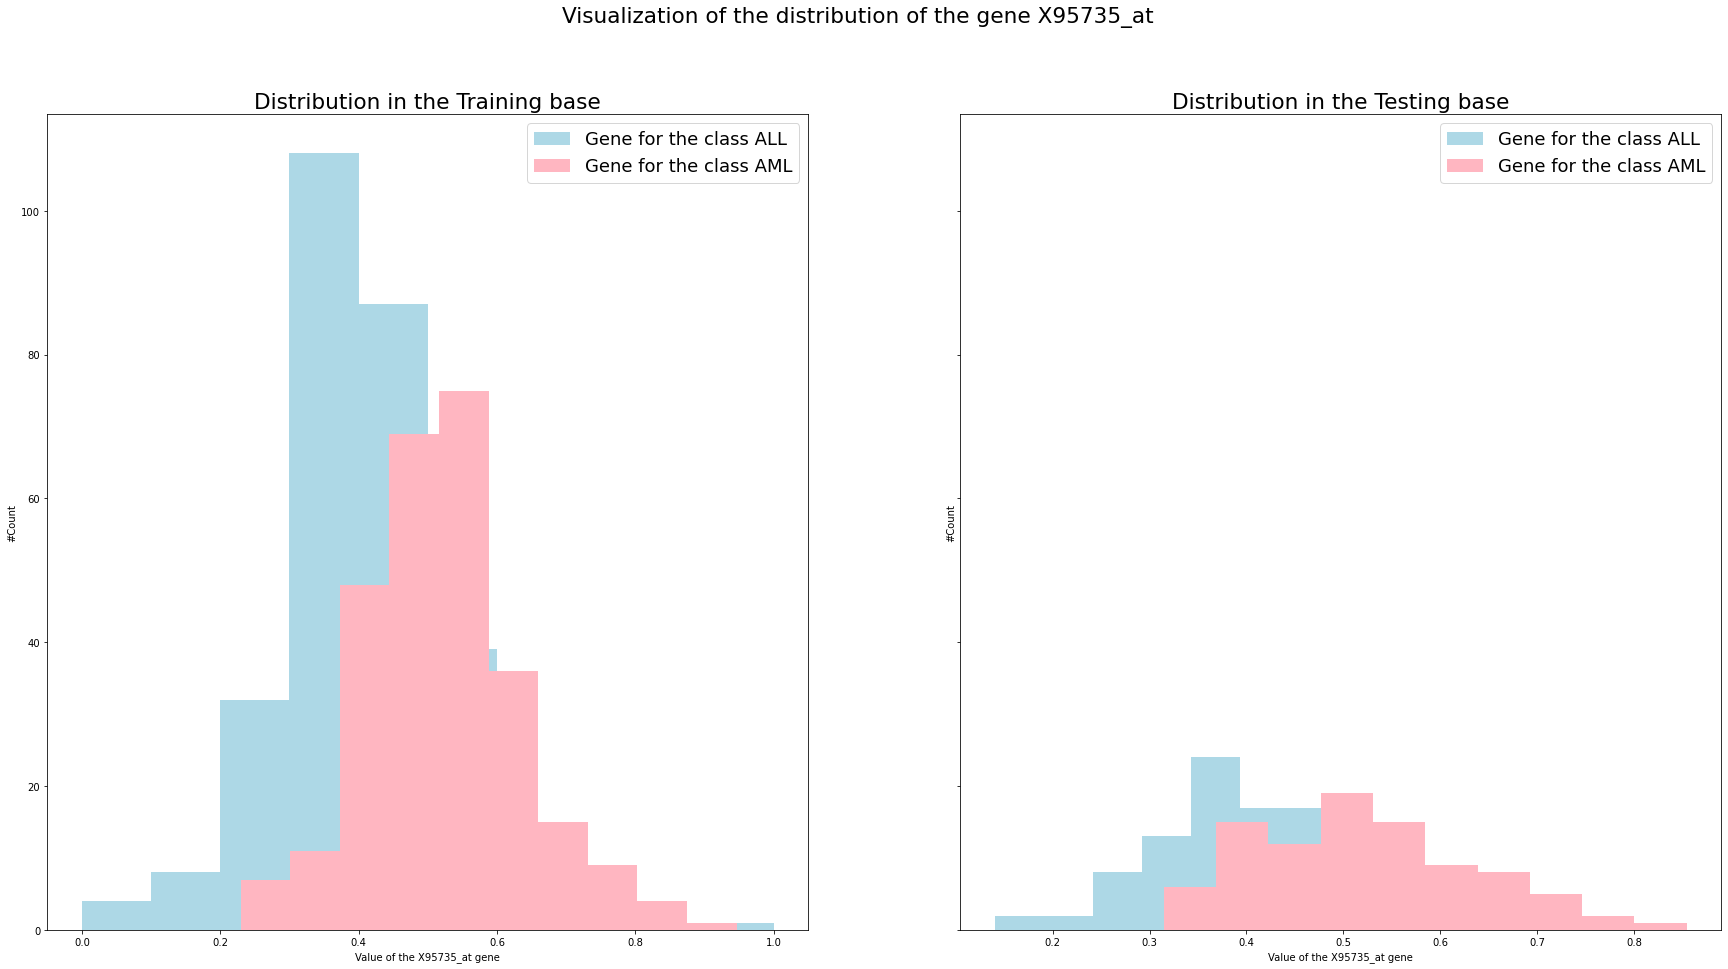

In [10]:
best_predictor = 'X95735_at'
fig, axes = plt.subplots(1, 2, figsize = (30, 15), sharey=True)
plt.rcParams['font.size'] = 18
fig.suptitle('Visualization of the distribution of the gene X95735_at')
axes[0].hist(X_train_normal[best_predictor][y_train_normal['Cancer_type']==0], label='Gene for the class ALL', color='lightblue')
axes[0].hist(X_train_normal[best_predictor][y_train_normal['Cancer_type']==1], label='Gene for the class AML', color='lightpink')
axes[0].set_xlabel('Value of the X95735_at gene')
axes[0].set_ylabel('#Count')
axes[0].set_title('Distribution in the Training base')
axes[0].legend()
axes[1].hist(X_test_normal[best_predictor][y_test_normal['Cancer_type']==0], label='Gene for the class ALL', color='lightblue')
axes[1].hist(X_test_normal[best_predictor][y_test_normal['Cancer_type']==1], label='Gene for the class AML', color='lightpink')
axes[1].set_xlabel('Value of the X95735_at gene')
axes[1].set_ylabel('#Count')
axes[1].set_title('Distribution in the Testing base')
axes[1].legend()
plt.show(fig)

<div class='exercise-r'>  
    
**1.4** Using `best_predictor`, create a classification model by eye-balling a value for this gene that would best discriminate the two cancer classes in the training set. (Note: Do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection.) Justify your choice of value in 1-2 sentences. Report the accuracy of your hand-chosen model on the train and test sets.

In [11]:
# your code here
eye_ball_train_preds = 1*(X_train_normal[best_predictor] > 0.5)
eye_ball_test_preds = 1*(X_test_normal[best_predictor] > 0.5)
training_accuracy_eye_ball = accuracy_score(eye_ball_train_preds, y_train_normal)
testing_accuracy_eye_ball = accuracy_score(eye_ball_test_preds, y_test_normal)
scores = [[training_accuracy_eye_ball, testing_accuracy_eye_ball]]
names = ['baseline']
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results


,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809


The baseline classification model will leverage the feature *X95735_at* and leverage some kinds of classification we have seen with the Bayes classifier: 
$$
\textit{X95735_at} > 0.5 \rightarrow y = AML
$$
$$
\textit{X95735_at} < 0.5 \rightarrow y = ALL
$$
In other words, we project our dataset normalized onto the line generated by this feature and the classification boundary is located at 0.5. We chose this boundary by eye-balling the boundary position in order to misclassify the least examples in the training set.

#### <div class='exercise'><b>Question 2 [25 pts]: Logistic Regression Modeling</b></div>

[▲ Return to contents](#Contents)

**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model. 
How do accuracies compare to the eye-balled ones from 1.4? 

**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).  
How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.

**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?

**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set. 
Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.

**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.

**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?


## Answers

<div class='exercise-r'>  
 
**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Calculate and display the training and test classification accuracies of this model.
 How do accuracies compare to the eye-balled ones from 1.4?
 
 </div>

In [12]:
y_train_normal = pd.Series(np.hstack(y_train_normal.values))
y_test_normal = pd.Series(np.hstack(y_test_normal.values))

In [13]:
# your code here
logit_single = LogisticRegression(C=100000, solver='lbfgs', max_iter=10000).fit(X_train_normal[best_predictor].values.reshape(-1, 1), y_train_normal)
training_accuracy_logit_single = logit_single.score(X_train_normal[best_predictor].values.reshape(-1, 1), y_train_normal)
testing_accuracy_logit_single = logit_single.score(X_test_normal[best_predictor].values.reshape(-1, 1), y_test_normal)
names.append('Single Logistic Regression')
scores.append([training_accuracy_logit_single, testing_accuracy_logit_single])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447


The results are better using the Logistic Regression layer before the classification. 

<div class='exercise-r'>  
 
**2.2** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values).
 How does the classification accuracy of this model compare with the logistic and eyeballed models above which were fit with a single gene? Be sure to evaluate both the training and test sets.
 
 </div>

In [14]:
display(X_train_normal)

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.508063,0.495929,0.281282,0.392837,0.547894,0.374699,0.779489,0.895275,0.687029,0.665053,...,0.510938,0.473068,0.326444,0.440131,0.545194,0.414099,0.432927,0.464673,0.666370,0.554254
1,0.402924,0.459334,0.715853,0.625070,0.670816,0.636583,0.871782,0.341996,0.814317,0.373040,...,0.438532,0.605083,0.869834,0.388637,0.556393,0.283606,0.448428,0.682124,0.769811,0.351574
2,0.420786,0.900401,0.432658,0.357197,0.734210,0.359543,0.529712,0.766635,0.587288,0.463121,...,0.196528,0.390532,0.368022,0.561676,0.910244,0.491734,0.199745,0.638105,0.601968,0.472755
3,0.670102,0.691733,0.484065,0.399723,0.788916,0.558930,0.418758,0.767150,0.566307,0.280145,...,0.591317,0.502873,0.526534,0.177501,0.652115,0.566523,0.188023,0.598173,0.279288,0.481206
4,0.717266,0.667333,0.449277,0.517736,0.784228,0.430328,0.608041,0.570838,0.456515,0.300812,...,0.447862,0.640025,0.270718,0.537177,0.451580,0.277408,0.208607,0.453790,0.422440,0.266976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.605393,0.617685,1.000000,0.720884,0.681058,0.772798,0.603806,0.579420,0.429342,0.360853,...,0.373968,0.515740,0.828128,0.505109,0.902549,0.554543,0.478554,0.838243,0.518728,0.285814
560,0.487446,0.643386,0.357753,0.378500,0.433666,0.181028,0.564859,0.443325,0.601739,0.435896,...,0.497187,0.344865,0.217375,0.338685,0.501695,0.477691,0.354740,0.592386,0.387742,0.503844
561,0.648835,0.574605,0.276424,0.015844,0.628720,0.612816,0.838207,0.261809,0.497353,0.586858,...,0.518060,0.464154,0.580260,0.599532,0.255560,0.312131,0.463890,0.478777,0.246202,0.403339
562,0.696133,0.715279,0.452966,0.397668,0.510738,0.312318,0.379122,0.454800,0.689299,0.578346,...,0.624698,0.459777,0.416870,0.493385,0.661865,0.628326,0.360736,0.616476,0.720797,0.366048


In [15]:
# your code here
logit = LogisticRegression(C=100000, solver='lbfgs', max_iter=10000).fit(X_train_normal, y_train_normal)
training_accuracy_logit = logit.score(X_train_normal, y_train_normal)
testing_accuracy_logit = logit.score(X_test_normal, y_test_normal)
names.append('Logistic Regression')
scores.append([training_accuracy_logit, testing_accuracy_logit])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787


From the table above, as expected, we observe that the traning accuracy when leveraging all 7129 features is 1.0. The underlying reason for this observation is that $p>>n$, leading to an overdefined model. The test accuracy for the *Logistic Regression* model is higher than the test accuracies for the *Baseline* and the *Single Logistic Regression* models. However, we observe a significant drop in the accuracy on the test set in comparison to the traning set (for the *Logistic Regression* model), which is a clear sign of overfitting the traning data. 

<div class='exercise-r'>  
 
**2.3** Print out the logistic regression coefficients for  `best_predictor` from the simple logistic and multiple logistic regression models in part 1 and part 2 above.  Interpret the coefficients: Do they agree or disagree?  What does this indicate?
 
 </div>

In [16]:
# your code here
print('When performing single logistic regression, the coefficient we got for the best predictor was ', *logit_single.coef_[0])
idx = np.hstack(np.argwhere(X_train_normal.columns==best_predictor))[0]
print('When performing full logistic regression, the coefficient we got for the best predictor was ',  logit.coef_[0][idx])

When performing single logistic regression, the coefficient we got for the best predictor was  9.842972135156298
When performing full logistic regression, the coefficient we got for the best predictor was  0.9938319536731622


These coefficients strongly disagree. Only the sign matches (meaning that the positive correlation is conserved). This indicates that there might be potential correlation between our feature X95735_at and the other features that were utilized in the full *Logistic Regression Model*.

<div class='exercise-r'>  
 
**2.4** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set.
 Report the chosen best value of the regularization hyperparamter and the classification accuracy on both the training and test sets.
 
 </div>

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# your code here
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lasso = LogisticRegressionCV(cv = 5, penalty='l1', Cs=Cs, scoring='accuracy', solver='saga', max_iter=1000).fit(X_train_normal, y_train_normal)
print('The best value of the regularization hyperparamter is ', str(*lasso.C_))
training_accuracy_lasso = lasso.score(X_train_normal, y_train_normal)
testing_accuracy_lasso = lasso.score(X_test_normal, y_test_normal)
names.append('Lasso Logistic Regression')
scores.append([training_accuracy_lasso, testing_accuracy_lasso])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

The best value of the regularization hyperparamter is  1.0


,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617


<div class='exercise-r'>  
 
**2.5** Compare the classification accuracies (both train and test) between the un-regularized multiple logistic regression model to the regularized one. Briefly explain why these results occur.
 
 </div>

The training accuracy of the regularized logistic regression drops down to 0.93. This is due to the fact that now we have 230 non-zero features and $p_{effective} < n$, meaning that the problem of not being able to uniquely determine the coefficient values is no longer present. However, now we observe a rather insignificant drop in the testing accuracy compared to the traning accuracy, and a substantial increase in the testing accuracy for the *Lasso Logistic Regression* model in comparison to the *Logistic Regression* model. The fundamental reason behind the above observation is that by reducing the numer of significant features, the model is no longer overdetermined, i.e. the model overfits the traning data considerably less.

<div class='exercise-r'>  
    
**2.6** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.2?

In [19]:
# your code here
print('The number of predictors that are considered important in this penalized logistic regression is ', np.sum(np.abs(np.asarray(lasso.coef_))>0.1))

The number of predictors that are considered important in this penalized logistic regression is  211


This means that the full logistic regression model in problem 2.2 leverages a lot of non-relevant or highly correlated features that are being killed by the feature selection process embedded in the Lasso algorithm. 

---

#### <div class='exercise'><b>Question 3 [20 pts]: Performing Principal Components Analysis</b></div>

[▲ Return to contents](#Contents)

**3.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set? 

**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.

**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).

**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

<hr>


## Answers

<div class='exercise-r'>  
 
**3.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set?
 
 </div>

In [20]:
# your code here
pca_decomp = PCA().fit(X_train_normal)
X_train_pca = pca_decomp.transform(X_train_normal)
X_test_pca = pca_decomp.transform(X_test_normal)
print(X_train_pca.shape, X_test_pca.shape)

(564, 564) (188, 564)


The limiting factor for the maximum number of PCA components for this dataset is the number of examples in the set on which we are fitting the PCA. From the singular value decomposition, we see that the number of components created is $min(n_{features}, n_{samples}).$ 

<div class='exercise-r'>  
 
**3.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top two PCA vectors is a useful approach to visualize a high dimensional classification problem.
 
 </div>

In [21]:
X_train_pca.shape

(564, 564)

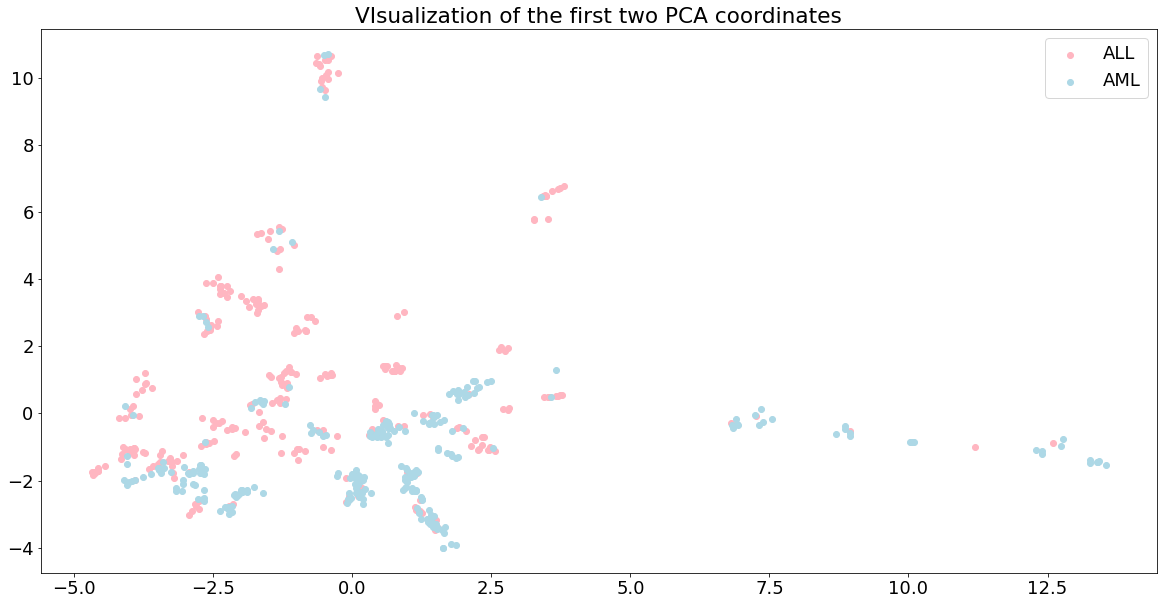

In [22]:
# your code here
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.set_title('VIsualization of the first two PCA coordinates')
ax.scatter(X_train_pca[:, 0][y_train_normal==0], X_train_pca[:, 1][y_train_normal==0], color='lightpink', label='ALL')
ax.scatter(X_train_pca[:, 0][y_train_normal==1], X_train_pca[:, 1][y_train_normal==1], color='lightblue', label = 'AML')
ax.legend()
plt.show(fig)

Vizualizing high dimensional data is a challenging problem. The benefits of using the scatter plot of the top two PCA vectors is a useful approach due to several reasons:
- Provides us with an easily implementable framework for visualizing high dimensional data.
- The top two (first two) principal components, capture the most variance/information about the original dataset. Consequently we can observe most of the information contained in the original multi dimensional dataset on a 2D plot.
- Usually better representation of the information contained in the original dataset in comparison to projecting the multi dimensional space in 2D.

<div class='exercise-r'>  
 
**3.3** Determine and report the variance explained in `X_train` based on the top two PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).
 
 </div>

In [23]:
ratio = pca_decomp.explained_variance_ratio_

In [24]:
print('The variance explained in X_train based on the top two PCA vectors is ', np.cumsum(ratio)[1])
print('The number of PCA vectors needed so that 90% of the variability in the predictors is explained is ', *np.argwhere((np.cumsum(ratio)>0.9)==True)[0])

The variance explained in X_train based on the top two PCA vectors is  0.11663364078007235
The number of PCA vectors needed so that 90% of the variability in the predictors is explained is  221


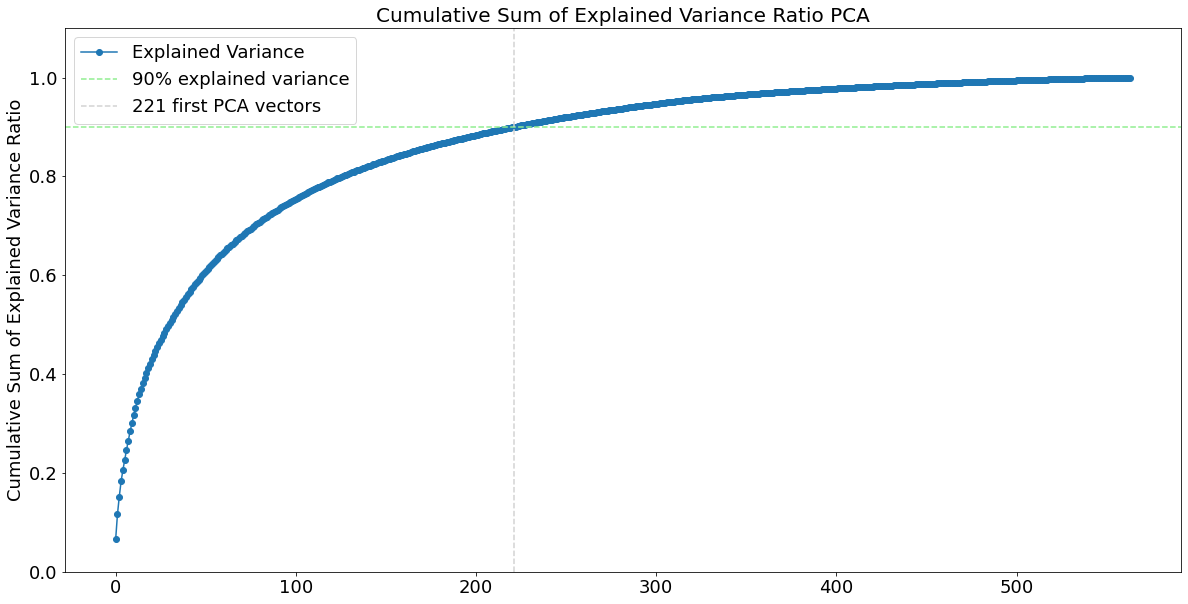

In [25]:
# your code here
fig, ax2 = plt.subplots(1, figsize=(20, 10))
ax2.plot(np.cumsum(ratio), 'o-', label='Explained Variance')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylim(0,1.1)
ax2.axhline(0.9, linestyle='--', color='lightgreen', label = '90% explained variance')
ax2.axvline(221, linestyle='--', color='lightgray', label='221 first PCA vectors')
ax2.legend()
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [26]:
n_components_90 = 221

<div class='exercise-r'>  
    
**3.4** Plot explained variability in the predictors on the $Y$-axis and the PCA component number on the $X$-axis. Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.

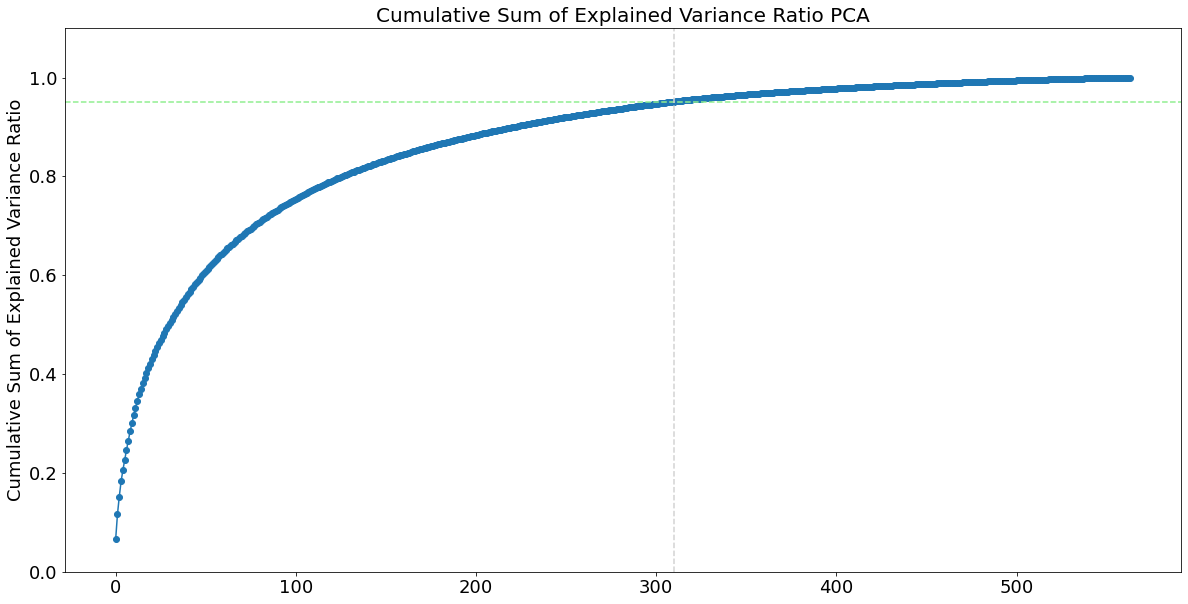

In [27]:
# your code here
ratio = pca_decomp.explained_variance_ratio_
fig, ax2 = plt.subplots(1, figsize=(20, 10))
ax2.plot(np.cumsum(ratio), 'o-', label='Explained Variance')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylim(0,1.1)
ax2.axhline(0.95, linestyle='--', color='lightgreen', label = '90% explained variance')
plt.axvline(310, linestyle='--', color='lightgray', label='221 first PCA vectors')
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [28]:
n_components_pca = 310

We will select the 310 first features from the PCA in order to have a training set which is no longer in the high-dimensional setting. One additional note is that 221 > 230, where 221 is the number of principle components necessary to retain 90% of the information contained in the original data set, and 203 is the number of predictors from the Lasso-like Logistic Regression we implemented in question 2.

#### <div class='exercise'><b>Question 4 [10 pts]: Principal Components Regression (PCR)</b></div>

[▲ Return to contents](#Contents)

**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?

**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well. 


<hr>


## Answers

<div class='exercise-r'>  
 
**4.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first two PCA vectors, (2) with the number of component vectors you chose from problem 3 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with the models fit in Question 2?
 
 </div>

In [29]:
# your code here
logit_2 = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train_pca[:, :2], y_train_normal)
training_accuracy_logit_2 = logit_2.score(X_train_pca[:, :2], y_train_normal)
testing_accuracy_logit_2 = logit_2.score(X_test_pca[:, :2], y_test_normal)
names.append('Logistic Regression with first 2 PCA vectors')
scores.append([training_accuracy_logit_2, testing_accuracy_logit_2])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277


In [30]:
logit_95 = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train_pca[:, :n_components_pca], y_train_normal)
training_accuracy_logit_95 = logit_95.score(X_train_pca[:, :n_components_pca], y_train_normal)
testing_accuracy_logit_95 = logit_95.score(X_test_pca[:, :n_components_pca], y_test_normal)
names.append('Logistic Regression with first 310 PCA vectors')
scores.append([training_accuracy_logit_95, testing_accuracy_logit_95])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277
Logistic Regression with first 310 PCA vectors,1.000000,0.787234


In [31]:
logit_90 = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train_pca[:, :n_components_90], y_train_normal)
training_accuracy_logit_90 = logit_90.score(X_train_pca[:, :n_components_90], y_train_normal)
testing_accuracy_logit_90 = logit_90.score(X_test_pca[:, :n_components_90], y_test_normal)
names.append('Logistic Regression with first 211 PCA vectors')
scores.append([training_accuracy_logit_90, testing_accuracy_logit_90])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277
Logistic Regression with first 310 PCA vectors,1.000000,0.787234
Logistic Regression with first 211 PCA vectors,0.996454,0.808511


One interesting fact to point out is that: the Constrained Logistic Regression model selected 230 features and generalized pretty well, while showing evidences that we do not overfit too much the data. However, when selecting **only** 211 features from the PCA decomposition, there are clear evidences that we do overfit the data and the drop in performances between training and testing result in the fact that our pca model performs worse than the lasso-penalized logistic regression.

<div class='exercise-r'>  
    
**4.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well.

In [32]:
import itertools

In [33]:
# your code here
max_num_features = X_train_pca.shape[0]
scores_val = []
lr = LogisticRegression(penalty='none', solver='lbfgs')
for num_features in range(1, max_num_features):
    score = np.mean(cross_val_score(lr, X_train_pca[:, :num_features], y_train_normal, cv=5))
    scores_val.append(score)

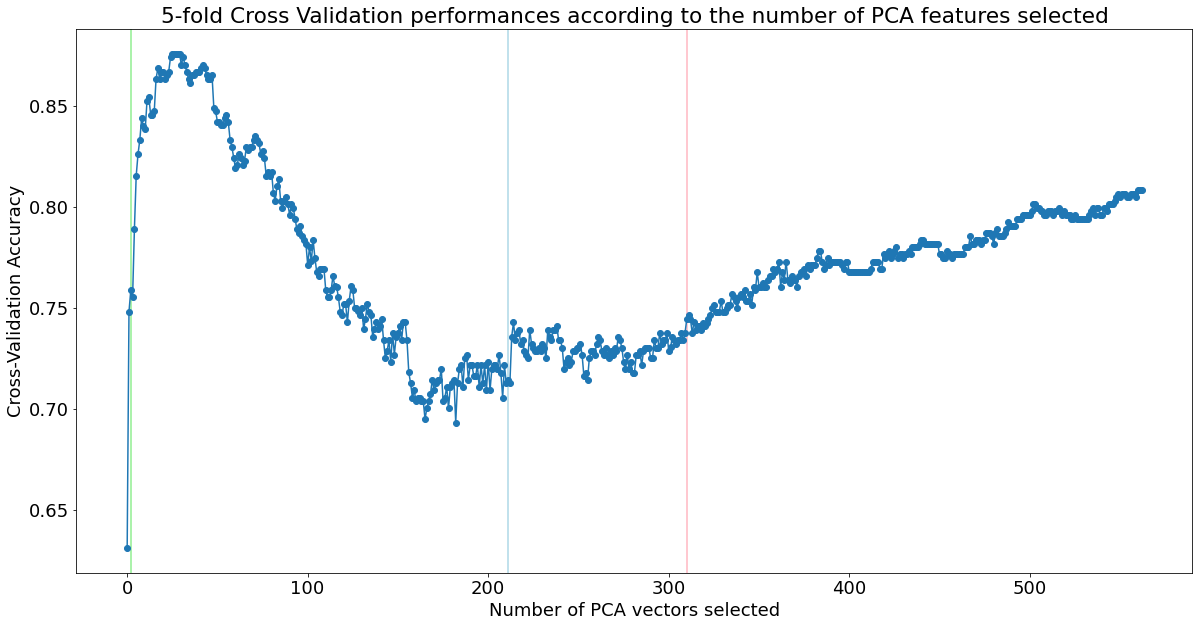

In [34]:
fig, ax3= plt.subplots(1, figsize = (20, 10))
ax3.set_title('5-fold Cross Validation performances according to the number of PCA features selected')
ax3.set_xlabel('Number of PCA vectors selected')
ax3.set_ylabel('Cross-Validation Accuracy')
ax3.axvline(2, label='Previous attempted model with 2 PCA features', color='lightgreen')
ax3.axvline(211, label='Previous attempted model with 211 PCA features', color='lightblue')
ax3.axvline(310, label='Previous attempted model with 310 PCA features', color='lightpink')
ax3.plot(scores_val, 'o-', label='Cross Validation Scores')
plt.show(fig)

In [35]:
print('The best number of principal components is ', np.argmax(scores_val), 'and the corresponding validation score is ', np.max(scores_val))

The best number of principal components is  25 and the corresponding validation score is  0.8758217446270544


In [36]:
n_components_val = np.argmax(scores_val)

In [37]:
logit_val = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train_pca[:, :n_components_val], y_train_normal)
training_accuracy_logit_val = logit_val.score(X_train_pca[:, :n_components_val], y_train_normal)
testing_accuracy_logit_val = logit_val.score(X_test_pca[:, :n_components_val], y_test_normal)
names.append('Validaton PCA Logistic Regression')
scores.append([training_accuracy_logit_val, testing_accuracy_logit_val])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277
Logistic Regression with first 310 PCA vectors,1.000000,0.787234
Logistic Regression with first 211 PCA vectors,0.996454,0.808511
Validaton PCA Logistic Regression,0.881206,0.882979


#### <div class='exercise'><b>Question 5 [25 pts]: Multi-Class Response</b></div>

[▲ Return to contents](#Contents)

As mentioned earlier, there are actually two subtypes of `ALL` cancer: B-cell and T-cell.  The variable `Cancer_subtype` designates the 3 cancer cubtypes: 
- 0 = ALL Type T, 
- 1 = ALL Type B, and 
- 2 = AML.  
Use this updated response variable to answer the following questions:

**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.

**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?

**Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**

**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.

**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?

**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).  

Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.

<hr>


## Answers

<div class='exercise-r'>  
 
**5.1** Fit two separate well-tuned, regularized (Ridge-like), multinomial logistic regression models to predict `Cancer_subtype`. For the first model, use the first two PCA components as predictors. For the second model, include  the quadratic and interaction terms for the first two PCA components, for a total of five predictors. Print and evaluate (with two or three sentences) the classification accuracy of the two models, on both train and test.
 
 </div>

In [38]:
y2_train_normal = y2_train.reset_index()
y2_train_normal.drop('index', axis=1, inplace=True)
y2_test_normal = y2_test.reset_index()
y2_test_normal.drop('index', axis=1, inplace=True)

In [39]:
y2_train_normal = pd.Series(np.hstack(y2_train_normal.values))
y2_test_normal = pd.Series(np.hstack(y2_test_normal.values))

In [40]:
# your code here, fine tune le C
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
logit_2_mc = LogisticRegressionCV(cv = 5, penalty='l2', Cs=Cs, scoring='accuracy', solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train_pca[:, :2], y2_train_normal)
training_accuracy_logit_2_mc = logit_2_mc.score(X_train_pca[:, :2], y2_train_normal)
testing_accuracy_logit_2_mc = logit_2_mc.score(X_test_pca[:, :2], y2_test_normal)
names.append('Multiclass Logistic Regression with first 2 PCA vectors')
scores.append([training_accuracy_logit_2_mc, testing_accuracy_logit_2_mc])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277
Logistic Regression with first 310 PCA vectors,1.000000,0.787234
Logistic Regression with first 211 PCA vectors,0.996454,0.808511
Validaton PCA Logistic Regression,0.881206,0.882979
Multiclass Logistic Regression with first 2 PCA vectors,0.634752,0.648936


In [41]:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_pca_poly = poly_transformer.fit_transform(X_train_pca[:, :2])
X_test_pca_poly = poly_transformer.transform(X_test_pca[:, :2])
print(X_train_pca_poly.shape)

(564, 5)


In [42]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
logit_2_mc_poly = LogisticRegressionCV(cv = 5, penalty='l2', Cs=Cs, scoring='accuracy', solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train_pca_poly, y2_train_normal)
training_accuracy_logit_2_mc_poly = logit_2_mc_poly.score(X_train_pca_poly, y2_train_normal)
testing_accuracy_logit_2_mc_poly = logit_2_mc_poly.score(X_test_pca_poly, y2_test_normal)
names.append('Multiclass Logistic Regression with first 2 PCA vectors, quadratic and interaction terms')
scores.append([training_accuracy_logit_2_mc_poly, testing_accuracy_logit_2_mc_poly])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

,Train Accuracy,Test Accuracy
baseline,0.714539,0.696809
Single Logistic Regression,0.718085,0.707447
Logistic Regression,1.000000,0.829787
Lasso Logistic Regression,0.934397,0.893617
Logistic Regression with first 2 PCA vectors,0.753546,0.771277
Logistic Regression with first 310 PCA vectors,1.000000,0.787234
Logistic Regression with first 211 PCA vectors,0.996454,0.808511
Validaton PCA Logistic Regression,0.881206,0.882979
Multiclass Logistic Regression with first 2 PCA vectors,0.634752,0.648936
"Multiclass Logistic Regression with first 2 PCA vectors, quadratic and interaction terms",0.689716,0.702128


The table above displays the values of the classification accuracy for both models on the traning and testing sets. One remarkable finding is that the classification accuracy on the testing set (compared to the classification accuracy on the training set) is higher for both models, i.e. neither model overfitts on the training data. Another thing we observe is that adding the quadratic and interaction terms, we retain more information from the original dataset, and consequently, the classification accuracy for the second model is higher on both the training and the testing sets.

<div class='exercise-r'>  
 
**5.2** Create two separate scatter plots (one will be for each model above) of the first two principal components of the test data and denote the three cancer types by different color and marker.  Plot the decision boundaries separately on the two scatterplots and interpret the results:  which model appears to draw more reasonable decision boundaries?  Do the first two principal components appear to provide enough predictive power for this classification problem?
 
 **Hint: you can use the `meshgrid` as seen in lecture exercises to generate the decision boundaries.**
 
 </div>

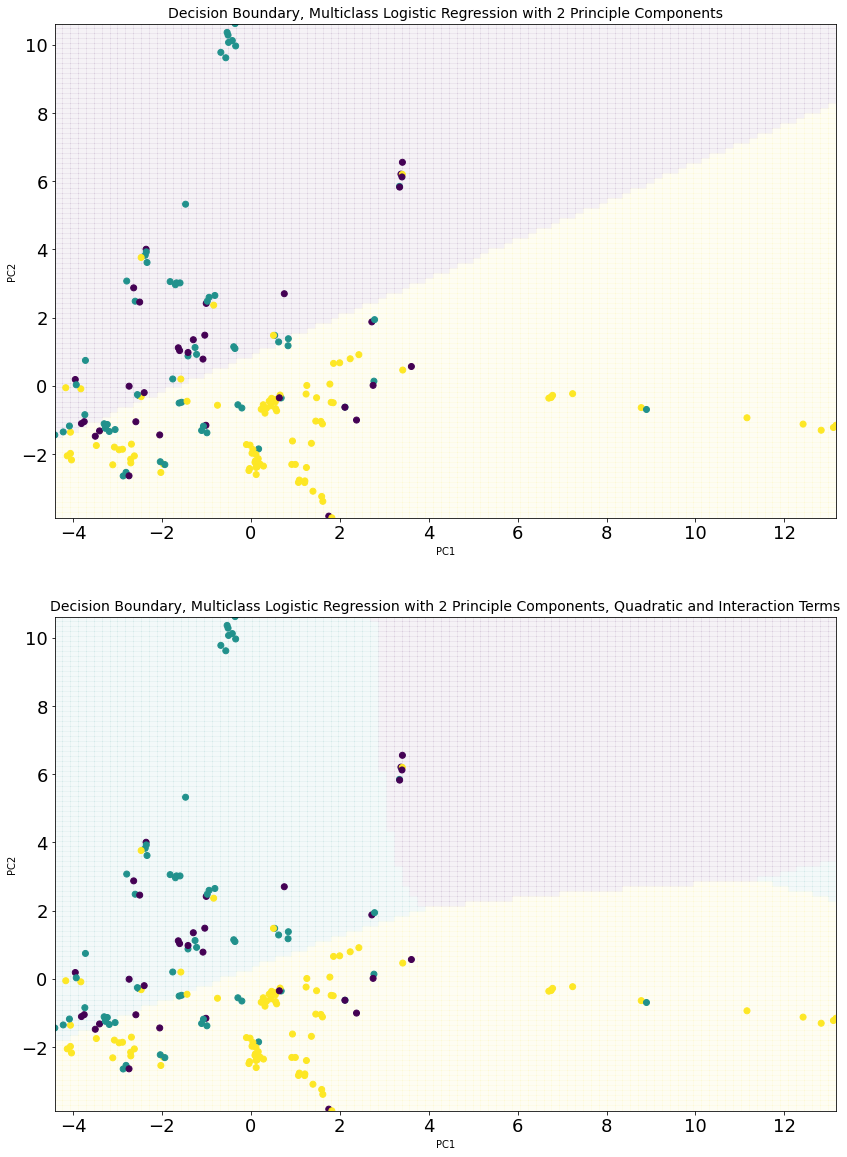

In [43]:
# your code here
n = 100

x1=np.linspace(np.min(X_test_pca[:, 0]),np.max(X_test_pca[:, 0]),n)
x2=np.linspace(np.min(X_test_pca[:, 1]),np.max(X_test_pca[:, 1]),n)

x1v, x2v = np.meshgrid(x1, x2)
X = np.c_[x1v.ravel(), x2v.ravel()]

X_dummy = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

yhat1 = logit_2_mc.predict(X)
yhat2 = logit_2_mc_poly.predict(X_dummy)

fig, ax = plt.subplots(2, 1,  figsize=(14, 20))

ax[0].pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
ax[0].scatter(X_test_pca[:, 0],X_test_pca[:, 1],c=y2_test_normal)
ax[0].set_ylabel("PC2", fontsize = 10)
ax[0].set_xlabel("PC1", fontsize = 10)
ax[0].set_title("Decision Boundary, Multiclass Logistic Regression with 2 Principle Components", fontsize = 14)

ax[1].pcolormesh(x1v, x2v, yhat2.reshape(x1v.shape),alpha = 0.05) 
ax[1].scatter(X_test_pca[:, 0],X_test_pca[:, 1],c=y2_test_normal)
ax[1].set_ylabel("PC2", fontsize = 10)
ax[1].set_xlabel("PC1", fontsize = 10)
ax[1].set_title("Decision Boundary, Multiclass Logistic Regression with 2 Principle Components, Quadratic and Interaction Terms", fontsize = 14)
plt.show()

<div class='exercise-r'>  
 
**5.3** Use cross-validation to determine the best number of principal components for this multiclass problem. Consider the set of [2, 5, 10, 15, 20, 50, and 100] components.  Be sure to clearly substantiate your choice.
 
 </div>

In [44]:
# your code here
num_features = [2, 5, 10, 15, 20, 50, 100]
scores_val = []
lr = LogisticRegression(penalty='none', solver='lbfgs', multi_class='multinomial')
for feature in num_features:
    score = np.mean(cross_val_score(lr, X_train_pca[:, :feature], y2_train_normal, cv=5))
    scores_val.append(score)

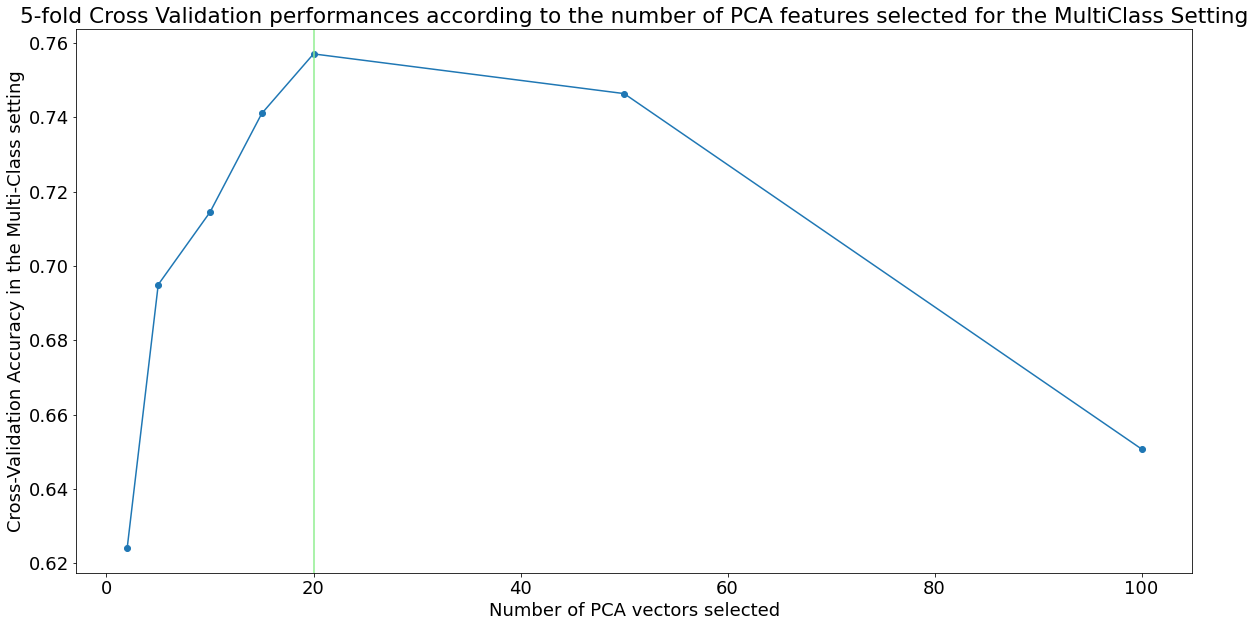

In [45]:
fig, ax3= plt.subplots(1, figsize = (20, 10))
ax3.set_title('5-fold Cross Validation performances according to the number of PCA features selected for the MultiClass Setting')
ax3.set_xlabel('Number of PCA vectors selected')
ax3.set_ylabel('Cross-Validation Accuracy in the Multi-Class setting')
ax3.plot(num_features, scores_val, 'o-', label='Cross Validation Scores')
ax3.axvline(20, label='Best Number of Principal COmponents', color='lightgreen')
plt.show(fig)

In [46]:
print('The best CV accuracy in the multi-class problem is attained when using ', str(num_features[np.argmax(scores_val)]), ' component vectors.')

The best CV accuracy in the multi-class problem is attained when using  20  component vectors.


In [47]:
best_number_5 = num_features[np.argmax(scores_val)]

<div class='exercise-r'>  
 
**5.4** For your best model in the previous part, determine the classification accuracies within each observed (not predicted) subtype in test: which group is the most difficult to classify accurately?  Is this surprising?  Why or why not?
 
 </div>

In [48]:
lr = LogisticRegression(penalty='none', solver='lbfgs', multi_class='multinomial').fit(X_train_pca[:, :best_number_5], y2_train_normal)

X_5_4 = pd.DataFrame(X_test_pca[:, :best_number_5])

x0 = X_5_4[y2_test_normal == 0]
y0 = y2_test_normal[y2_test_normal == 0]
x1 = X_5_4[y2_test_normal == 1]
y1 = y2_test_normal[y2_test_normal == 1]
x2 = X_5_4[y2_test_normal == 2]
y2 = y2_test_normal[y2_test_normal == 2]

test54_x0 = lr.score(x0, y0)
test54_x1 = lr.score(x1, y1)
test54_x2 = lr.score(x2, y2)

df_5_4 = pd.DataFrame([test54_x0, test54_x1, test54_x2], index = ['ALL/T', 'ALL/B', 'ALM'], columns = ['Classification Accuracy'])
display(df_5_4)

,Classification Accuracy
ALL/T,0.333333
ALL/B,0.809524
ALM,0.902174


From the table above we observe that the most difficult group to predict is *group 0 (ALL type T)*. This observation is not surprising, but rather expected. The main reason is that the *ALL type T* group is underrepresented in the testing set and therefore it is 'ignored' by the Logistic Regression algorithm. Consequently we deduce that the Logistic Regression model, misclassifies *66.7%* of the observations that are originally *ALL type T* as either *ALL type B* or *ALM*.

<div class='exercise-r'>  
 
**5.5** In the 2-class problem the classification threshold can be altered from 0.5 to affect the number of false positives and false negatives (this is what the ROC curve is based on). In the multiclass setting, the predicted class probabilities can be weighted to determine the winning class (so that a smaller class will not be 'ignored' by the algorithm): essentially, each class's predicted probability can be multiplied by this class weight and compared to determine the classification.
 
 Determine the classification accuracies in each observed subtype in test if instead the observations were weighted more 'fairly': they are inversely weighted based on the observed sample sizes in train (so that if there were just 2 groups in the response with 75% of the response in one class and 25% in the other, the smaller class should be weighted 3 times as much as the larger class).
 
 Report the weights you used and the resulting classification accuracies in each subtype.  In what way have the results improved?  In what way have the results not improved?  Comment with 2-3 sentences.
 </div>

In [50]:
# your code here
s0 = np.sum(y2_test_normal == 0)
s1 = np.sum(y2_test_normal == 1)
s2 = np.sum(y2_test_normal == 2)
max_s = np.max([s0,s1,s2])
w0 = max_s/s0
w1 = max_s/s1
w2 = max_s/s2

print(f"The weights for the three response classes are: {np.round(w0,2), np.round(w1,2), np.round(w2,2)}.")

lr1 = LogisticRegression(penalty='none', solver='lbfgs', multi_class='multinomial', class_weight={0:w0,1:w1,2:w2}).fit(X_train_pca[:, :best_number_5], y2_train_normal)

X_5_5 = pd.DataFrame(X_test_pca[:, :best_number_5])

x0 = X_5_5[y2_test_normal == 0]
y0 = y2_test_normal[y2_test_normal == 0]
x1 = X_5_5[y2_test_normal == 1]
y1 = y2_test_normal[y2_test_normal == 1]
x2 = X_5_5[y2_test_normal == 2]
y2 = y2_test_normal[y2_test_normal == 2]

test55_x0 = lr1.score(x0, y0)
test55_x1 = lr1.score(x1, y1)
test55_x2 = lr1.score(x2, y2)

df_5_5 = pd.DataFrame([test55_x0, test55_x1, test55_x2], index = ['ALL/T', 'ALL/B', 'ALM'], columns = ['Classification Accuracy'])
display(df_5_5)


The weights for the three response classes are: (2.79, 1.46, 1.0).


,Classification Accuracy
ALL/T,0.545455
ALL/B,0.634921
ALM,0.869565


The weights for the three response classes are: $w_{ALL/T} = 2.79; w_{ALL/B} = 1.46; w_{ALM} = 1.0$. The values of the weights were determined using the approach explained in the problem definition.

We observe from the table above, as expected, that the classification accuracy for the *ALL type T* class has improved, but the classification accuracies for the *ALL type B* and *ALM* classes have both decreased. The reason for this behaviour is that we have altered the values of the classification boundaries, adjusting them towards improving the classification accuracy for the underrepresented *ALL type T* class. Consequently, adjusting the boundaries to improve the prediction accuracy for one class, leads to a subsequent decrease in the classification accuracies for the other two classes.